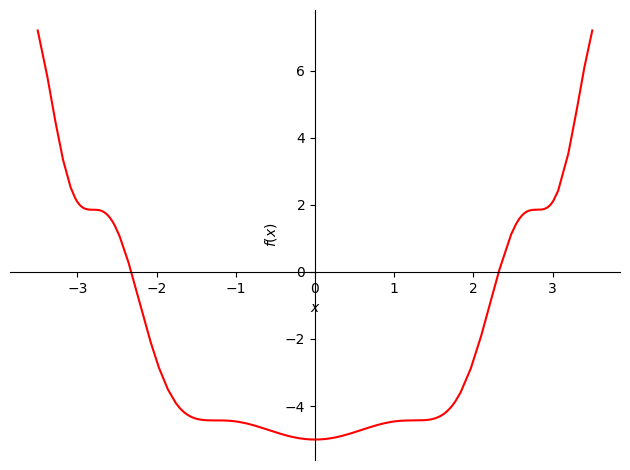

In [10]:
#Встановлюємо необхідні бібліотеки і функції та будуємо графік
import sympy as sp
import numpy as np
from scipy.optimize import root, minimize_scalar
# import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
x = sp.symbols('x', real=True)
f = sp.Function('f', real=True)
f = x**2 + sp.cos(x**2) - 6
p = sp.plot(f, (x, -3.5, 3.5), show=False, line_color= 'r')
p.show()

Корінь = [2.31958997]


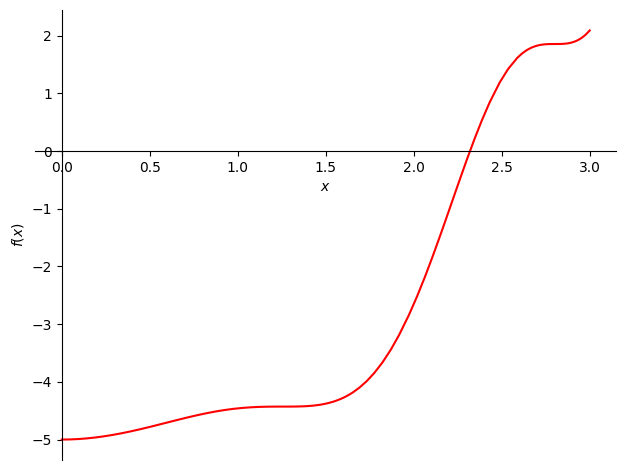

In [11]:
#[2, 2.5] - обраний інтервал. Деталізуємо графік для обраного інтервалу та знаходимо корінь рівняння за допомогою вбудованої функції
g0 = sp.lambdify(x, f)
solved = root(g0, 0)
print('Корінь =',solved.x)
p1 = sp.plot(f, (x, 0, 3), show=False, line_color= 'r')
p1.show()

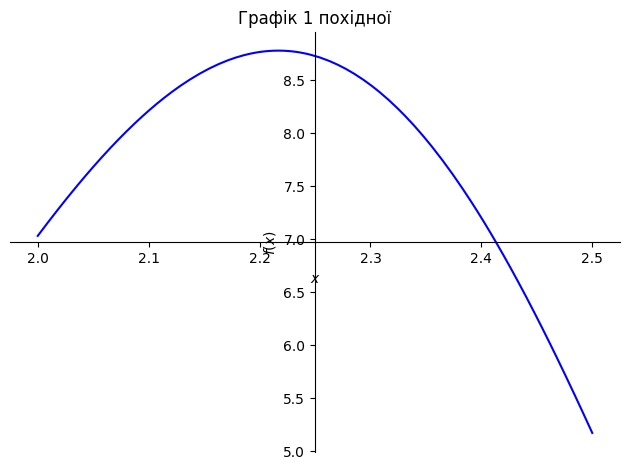

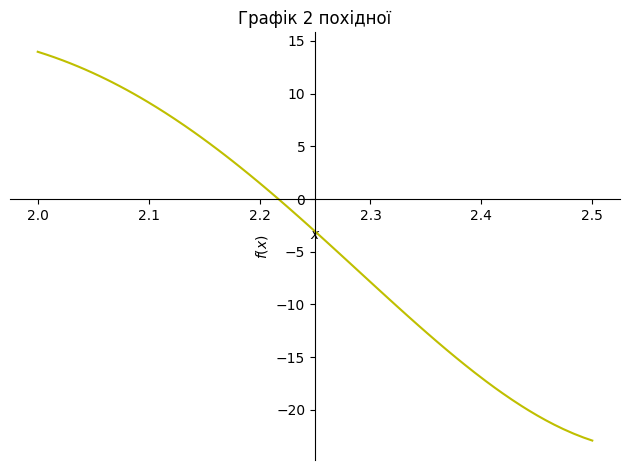

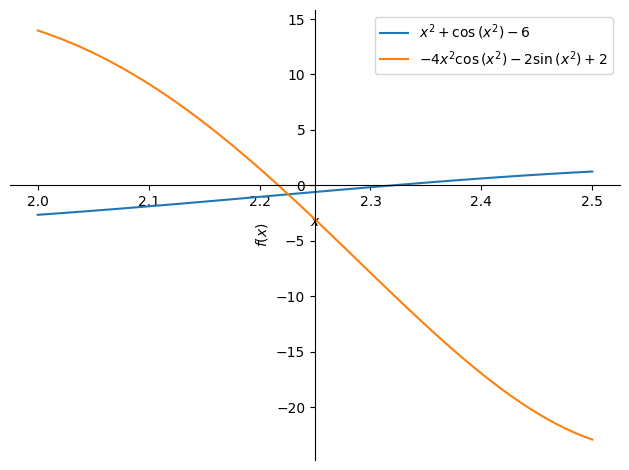

In [12]:
#1 Релаксаційний метод
f1 = sp.Function('f1', real=True)
f1 = sp.diff(f, x)
f2 = sp.diff(sp.diff(f, x), x) #2 похідна
p2 = sp.plot(f1, (x, 2, 2.5), show=False, line_color='b', title ='Графік 1 похідної')
p3 = sp.plot(f2, (x, 2, 2.5), show=False, line_color='y', title ='Графік 2 похідної')
p2.show()
p3.show()
p4 = sp.plot(f, f2, (x, 2, 2.5), legend= True)
# p4.show()

In [13]:
g = sp.lambdify(x, f1)
maximum = minimize_scalar(lambda x: -g(x), bounds=(2.0, 2.5), method='bounded')
M1 = -maximum.fun
minimum = minimize_scalar(g, bounds=(2.0, 2.5), method='bounded')
m1 = minimum.fun
tao = 2/(m1+M1)
print(f'Релаксаційний параметр \u03C4 = {float(tao)}')
print(f'Інтервал: [0, {2/M1}]')

Релаксаційний параметр τ = 0.14343890438350368
Інтервал: [0, 0.22786255650868356]


In [14]:
n = 7
fi = x - tao*f
x_0 = 1
def nestList(f,y,c):    #[x, f(x), f(f(x)), ...]
    result = [y]
    for i in range(c):
        y = f.subs(x, y)
        result.append(float(y))
    return result
L1 = nestList(fi, x_0, n)
print(f'NestList = {L1}')
ep = abs(L1[n] - L1[n-1])
print(f'Точність = {ep}')

NestList = [1, 1.6396941511279117, 2.243649841542049, 2.336881338904954, 2.316563686060475, 2.3201646668642093, 2.319482267358109, 2.3196102017792137]
Точність = 0.00012793442110492492


In [15]:
#Метод січних
def secant_method(x, g, ivl, eps, it_am):
    f = sp.lambdify(x, g)
    ep = 1.0
    x = [0]*(16)
    x[0] = ivl[0]
    x[1] = ivl[1]
    print(f'n = {0}, x = {x[0]}, f(x) = {f(x[0])}, \u0394x = {ep}')
    # print(f'n = {1}, x = {x[1]}, f(x) = {f(x[1])}, \u0394x = {ep}')
    n = 1
    while ep > eps:
        while n <= it_am:
            x[n+1] = (x[n] - (f(x[n])*(x[n] - x[n-1]))/(f(x[n]) - f(x[n-1])))
            ep = abs(x[n+1] - x[n])
            print(f'n = {n}, x = {x[n]}, f(x) = {f(x[n])}, \u0394x = {ep}')
            n += 1

In [16]:
ivl = [2, 2.5]
x = sp.symbols('x')
f = sp.Function('f', real=True)
f = x**2 + sp.cos(x**2) - 6
secant_method(x, f, ivl, 0.00001, 7)

n = 0, x = 2, f(x) = -2.653643620863612, Δx = 1.0
n = 1, x = 2.5, f(x) = 1.2494494182244997, Δx = 0.16005888223925258
n = 2, x = 2.3399411177607474, f(x) = 0.1663706313777613, Δx = 0.02458648218315762
n = 3, x = 2.31535463557759, f(x) = -0.035158759638243, Δx = 0.0042893506156573835
n = 4, x = 2.319643986193247, f(x) = 0.00044731298704725475, Δx = 5.388637653380712e-05
n = 5, x = 2.3195900998167134, f(x) = 1.0988950736035008e-06, Δx = 1.3270641785467774e-07
n = 6, x = 2.3195899671102955, f(x) = -3.4999558806703135e-11, Δx = 4.226397010143046e-12
n = 7, x = 2.319589967114522, f(x) = -8.881784197001252e-16, Δx = 0.0


In [17]:
#Комбінований метод
del f
x = sp.symbols('x', real=True)
f = sp.Function('f', real=True)
f = x**2 + sp.cos(x**2) - 6
g = sp.lambdify(x, f)
g1 = sp.lambdify(x, f1)
x0 = 2.22
print(float(f2.subs(x, x0)*f.subs(x, x0)), '> 0')
z0 = 2
x, z1 = 2.5, 2.5
n = 0
eps = 0.001
ep = 1
print(f'n = {n}, x = {x}, z1 = {z1}, \u0394x = {ep}')
while ep > eps:
    z1 = z1 - g(z1)*(z0-z1)/(g(z0) - g(z1))
    x = x - g(x)/g1(x)
    ep = abs(z1 - x)
    z0 = x
    n += 1
    print(f'n = {n}, x = {x}, z1 = {z1}, \u0394x = {ep}')

0.2330005582689028 > 0
n = 0, x = 2.5, z1 = 2.5, Δx = 1
n = 1, x = 2.2581350073224224, z1 = 2.3399411177607474, Δx = 0.08180611043832497
n = 2, x = 2.3183280400120982, z1 = 2.3202158366019967, Δx = 0.0018877965898984606
n = 3, x = 2.319589037496742, z1 = 2.319590431549954, Δx = 1.3940532119782745e-06
